In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt
import math

# 1D

In [2]:
dX = 0.125
L = 10
num = int((2 * L) / dX + 1)
X = np.linspace(-L, L, num)
P_x = np.array([float(x == 0) for x in X])

In [3]:
dT = 0.001
D = 5

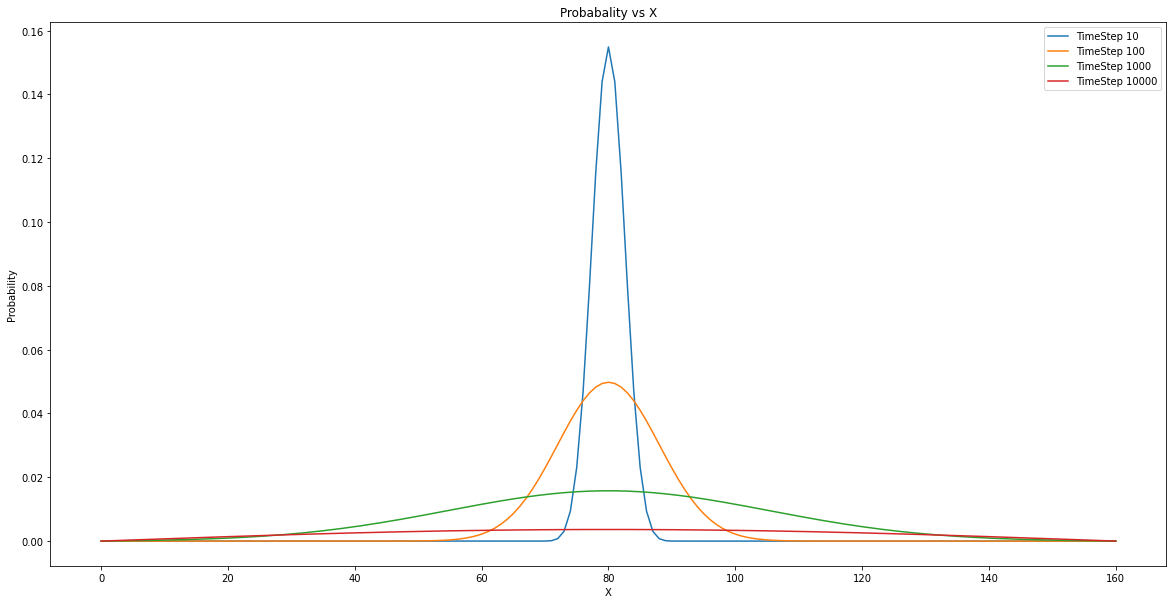

In [4]:
plt.figure(figsize=(20, 10))
plt.title(f"Probabality vs X")
plt.xlabel("X")
plt.ylabel("Probability")

for n in [10, 100, 1000, 10000]:
    P_prime = P_x.copy()
    for i in range(n):
        temp_p = np.zeros(P_prime.shape)
        for j in range(1, P_prime.shape[0] - 1):
            temp_p[j] = P_prime[j] + (D * dT / dX ** 2) * (P_prime[j + 1] - 2 * P_prime[j] + P_prime[j - 1])
        P_prime = temp_p.copy()
        
    plt.plot(P_prime, label = f"TimeStep {n}")

plt.legend()
plt.show()

# 2D

In [8]:
dX = 0.125
dY = 0.125
L = 1
num_X = int((2 * L) / dX + 1)
num_Y = int((2 * L) / dY + 1)
X = np.linspace(-L, L, num_X)
Y = np.linspace(-L, L, num_Y)
P = np.zeros((X.shape[0], Y.shape[0]))
for i in range(P.shape[0]):
    for j in range(P.shape[1]):
        P[i][j] = float(X[i] == 0 and Y[j] == 0)

In [9]:
dT = 0.001
D = [[2, 2], [2, 3], [3, 2]]

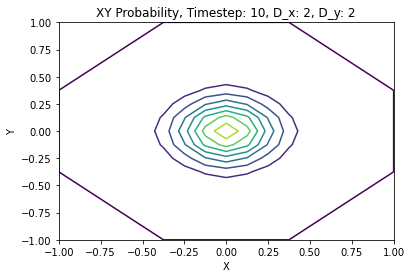

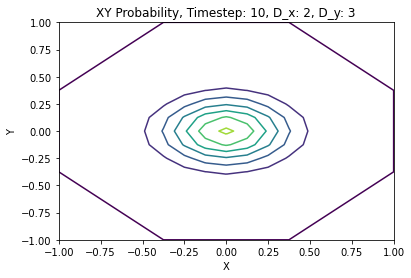

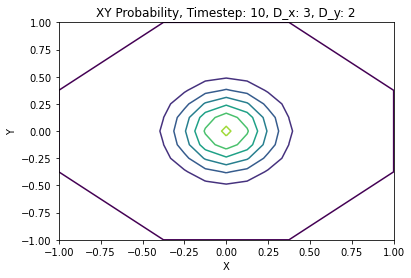

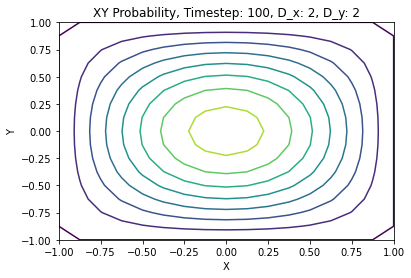

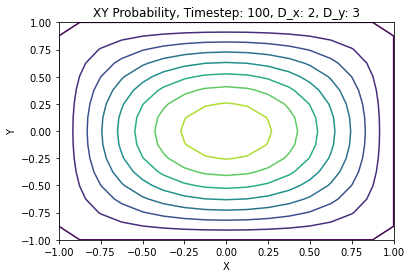

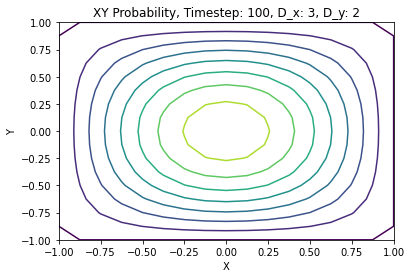

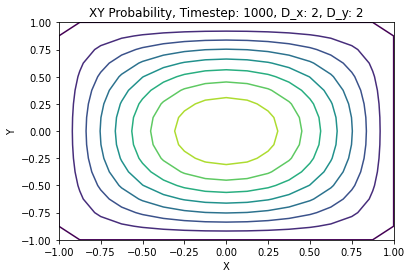

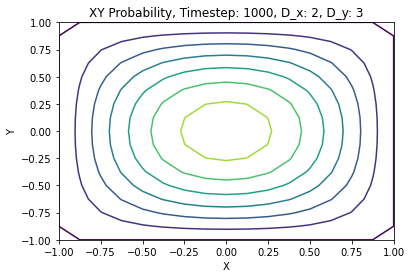

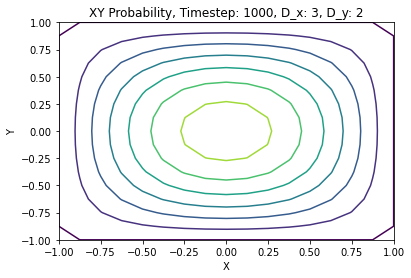

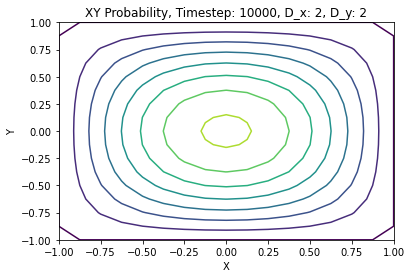

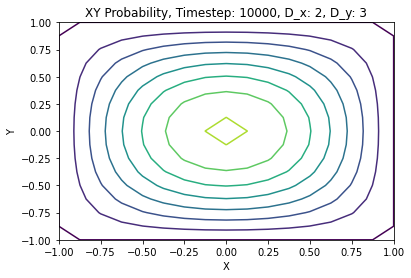

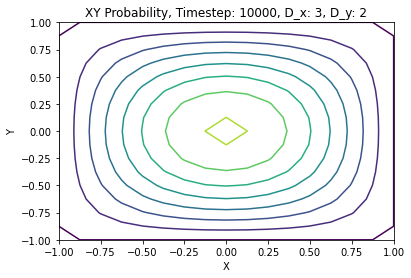

In [10]:
for n in [10, 100, 1000, 10000]: # Add and remove timesteps according to need and computational time
    for d in D:
        P_prime = P.copy()
        D_x = d[0]
        D_y = d[1]
        for _i in range(n):
            temp_p = np.zeros(P_prime.shape)
            for i in range(1, P_prime.shape[0] - 1):
                for j in range(1, P_prime.shape[1] - 1):
                    temp_p[i][j] = P_prime[i][j] + (D_x * dT / dX ** 2) * (P_prime[i + 1][j] - 2 * P_prime[i][j] + P_prime[i - 1][j]) + (D_y * dT / dY ** 2) * (P_prime[i][j + 1] - 2 * P_prime[i][j] + P_prime[i][j - 1])
            P_prime = temp_p.copy()

        plt.title(f"XY Probability, Timestep: {n}, D_x: {D_x}, D_y: {D_y}")
        plt.xlabel("X")
        plt.ylabel("Y")
        plt.contour(X, Y, P_prime)
        plt.show()